#### Main steps:
1. Get the data
2. Discover and visualize data to gain insights
3. Prepare data for Machine learning algorithms
4. Select a model and train it
5. Fine-tune model
6. Evaluate the system 

# 1. Get the data

In [50]:
from sklearn.datasets import fetch_california_housing
import pandas as pd

data_housing = fetch_california_housing()
df = pd.DataFrame(data_housing.data, columns = data_housing.feature_names)
df['AvgHouseVal'] = data_housing.target
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   AvgHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [51]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvgHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [91]:
data_housing.DESCR

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 20640\n\n    :Number of Attributes: 8 numeric, predictive attributes and the target\n\n    :Attribute Information:\n        - MedInc        median income in block\n        - HouseAge      median house age in block\n        - AveRooms      average number of rooms\n        - AveBedrms     average number of bedrooms\n        - Population    block population\n        - AveOccup      average house occupancy\n        - Latitude      house block latitude\n        - Longitude     house block longitude\n\n    :Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttp://lib.stat.cmu.edu/datasets/\n\nThe target variable is the median house value for California districts.\n\nThis dataset was derived from the 1990 U.S. census, using one row per census\nblock group. A block group is the smallest geographical unit

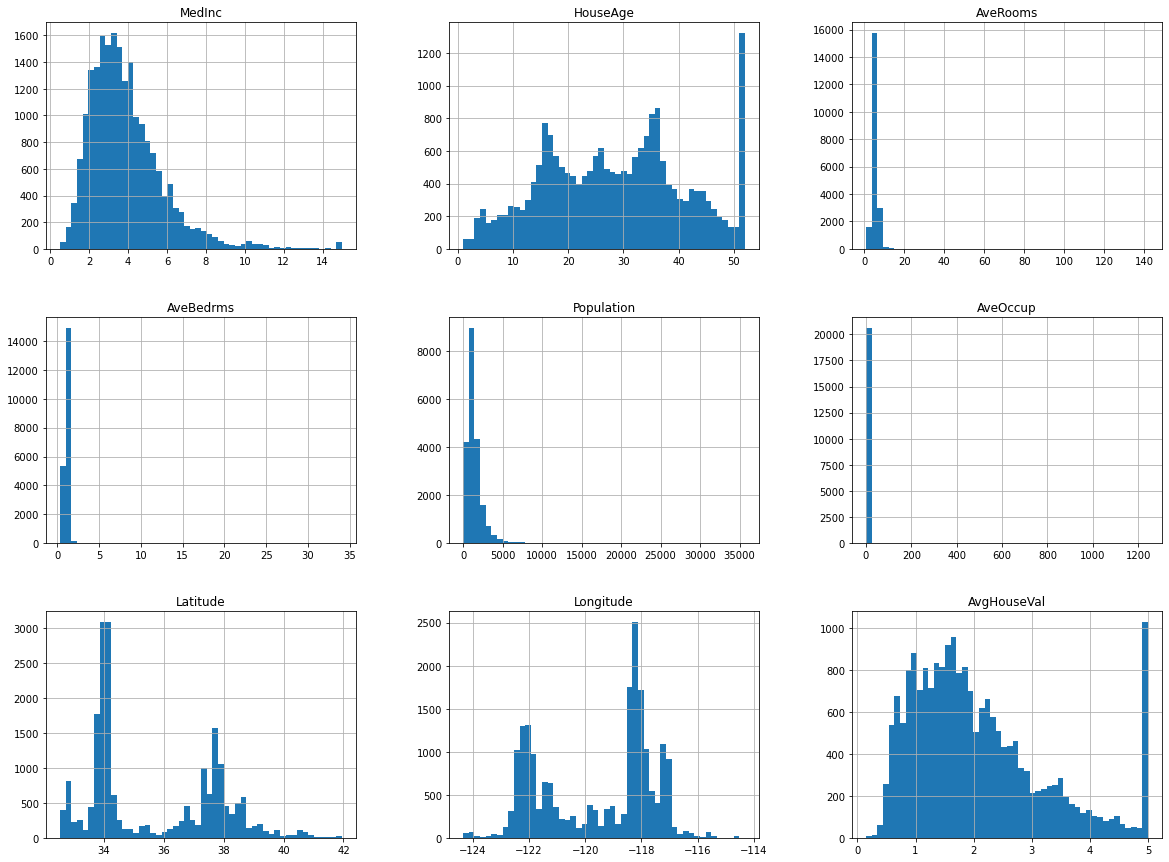

In [53]:
import matplotlib.pyplot as plt

#plot on whole dataset
df.hist(bins=50, figsize=(20,15))
plt.show()


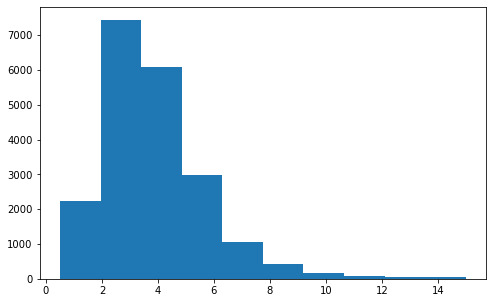

In [54]:
#plot a histogram for each numerical attribute
plt.figure(figsize=(8,5))
plt.hist(df['MedInc'])
plt.show()

Medium income is expressed in US dollars, represent roughtly USD 10000. Data has been scaled and capped at 15 (actually, 15000) for higher incomes and at 0.5 (actually, 5000) for lower incomes
Medium house value is expressed in US dollars, represent roughtly USD 100000

#### Create Test set

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,AvgHouseVal
5241,8.2816,29.0,6.715625,1.054167,2184.0,2.275000,34.12,-118.39,5.00001
10970,4.6111,39.0,6.388633,1.006144,1669.0,2.563748,33.77,-117.86,2.40300
20351,3.0119,27.0,4.973744,1.057078,2110.0,2.408676,34.21,-119.05,2.18200
6568,4.1518,52.0,5.546584,0.950311,1018.0,3.161491,34.20,-118.15,1.82100
13285,4.0375,32.0,5.877483,1.039735,1067.0,3.533113,34.07,-117.68,1.21300


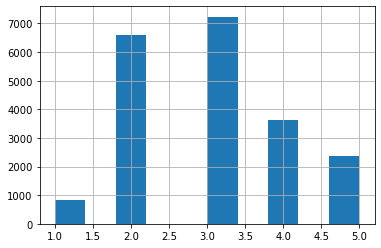

In [74]:
#there are 2 way to split data: train_test_split() or stratified sampling

#use train_test_split()
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

#stratified sampling
import numpy as np
df['income_categorical'] = pd.cut(df['MedInc'], bins=[0., 1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])
df['income_categorical'].hist()

from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(df, df['income_categorical']):
    strat_train_set = df.loc[train_index]
    strat_test_set = df.loc[test_index]
for i in (strat_train_set,strat_test_set):
    i.drop('income_categorical', axis=1, inplace=True)
strat_test_set.head()

# 2. Discover and visualize data to gain insights

In [75]:
housing = strat_train_set.copy()

#### Visualizing Geographical Data

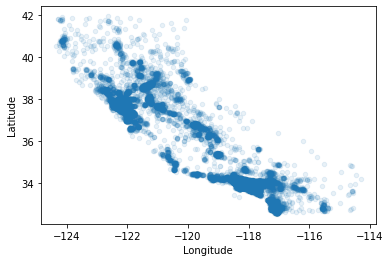

In [76]:
#create a scatterplot of all districts 
#set alpha option to make it much easier to visualize the places where there is a high density of data points
housing.plot(kind='scatter', x='Longitude', y='Latitude', alpha=0.1)
plt.show()

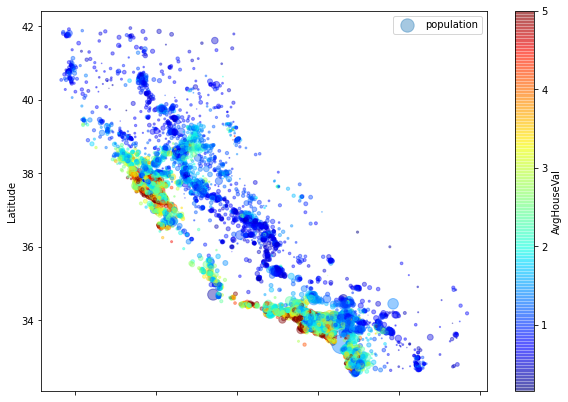

In [78]:
housing.plot(kind='scatter',x='Longitude', y='Latitude', alpha=0.4,
       s=housing['Population']/100, label='population', figsize=(10,7),
       c='AvgHouseVal', cmap=plt.get_cmap('jet'),
       colorbar=True)
plt.legend()

#### Looking for Correlations

In [79]:
corr_matrix = housing.corr()
corr_matrix['AvgHouseVal'].sort_values(ascending=False)

AvgHouseVal    1.000000
MedInc         0.687160
AveRooms       0.146285
HouseAge       0.114110
AveOccup      -0.021985
Population    -0.026920
AveBedrms     -0.043289
Longitude     -0.047432
Latitude      -0.142724
Name: AvgHouseVal, dtype: float64

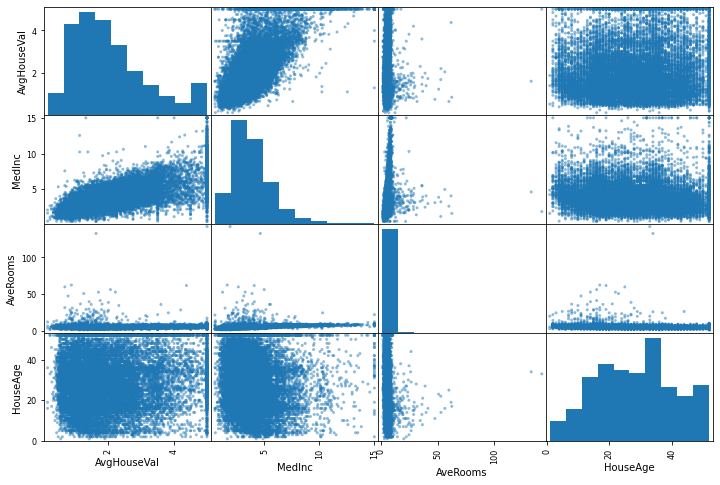

In [80]:
from pandas.plotting import scatter_matrix

attributes = ['AvgHouseVal','MedInc', 'AveRooms', 'HouseAge']
scatter_matrix(housing[attributes], figsize=(12,8))
plt.show()

# 3. Prepare data for Machine learning algorithms

In [81]:
housing = strat_train_set.drop('AvgHouseVal', axis=1)
housing_label = strat_train_set['AvgHouseVal'].copy()

#### Data Cleaning

In [84]:
#Scikit-Learn provide a handy class to take care of missing values: SimpleImputer
#imputer compute the median of each (numerical) attribute and store the result in statistics_ instance variable
#we apply imputer for all attribute because we cannot be sure that there won't be any missing values in new data after the system goes live
#imputer.fit(), imputer.transform()
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

#### Transformation Pipeline

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
    ('imp', SimpleImputer(strategy = 'median')),
    ('std_scaler', StandardScaler())
])
housing_prepared = pipe.fit_transform(housing)

# 4. Select a model and train it

In [86]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_label)

LinearRegression()

In [104]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_label)

DecisionTreeRegressor()

In [117]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_label)

RandomForestRegressor()

#### Evaluating on Training set

In [122]:
#Evaluate using MSE:
from sklearn.metrics import mean_squared_error

housing_predict_lin_reg = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_label, housing_predict_lin_reg)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7271432891803268

In [123]:
housing_predict_tree_reg = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_label, housing_predict_tree_reg)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

2.7982715280036345e-16

In [125]:
housing_predict_forest_reg = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_label, housing_predict_forest_reg)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

0.18970159830209596

In [126]:
#Evaluate using Cross-Validation
#cross-validation features expect utility function (greater is better), so the scoring function
#is the opposite of the MSE (negative value)
from sklearn.model_selection import cross_val_score
score_lin_reg = cross_val_score(lin_reg, housing_prepared, housing_label,
                         scoring='neg_mean_squared_error',cv=10)
rmse_score_lin_reg = np.sqrt(-score_lin_reg)
rmse_score_lin_reg

array([0.7036911 , 0.72431503, 0.72680092, 0.73050519, 0.75637811,
       0.74775988, 0.68872509, 0.73301589, 0.76535004, 0.72080567])

In [127]:
score_tree_reg = cross_val_score(tree_reg, housing_prepared, housing_label,
                         scoring='neg_mean_squared_error',cv=10)
rmse_score_tree_reg = np.sqrt(-score_tree_reg)
rmse_score_tree_reg

array([0.70174532, 0.74349426, 0.73236322, 0.71455404, 0.70312637,
       0.71493362, 0.74159968, 0.71054529, 0.70258305, 0.74612622])

In [128]:
score_forest_reg = cross_val_score(forest_reg, housing_prepared, housing_label,
                         scoring='neg_mean_squared_error',cv=10)
rmse_score_forest_reg = np.sqrt(-score_forest_reg)
rmse_score_forest_reg

array([0.5018197 , 0.4815435 , 0.50451551, 0.53281617, 0.49743237,
       0.5400562 , 0.48817661, 0.49595766, 0.54431125, 0.51563424])

# 5.Fine-tune model

#### Grid-Search

In [134]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)
grid_search.fit(housing_prepared, housing_label)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [135]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 30}

In [136]:
grid_search.best_estimator_

RandomForestRegressor(max_features=2, n_estimators=30)

In [137]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

0.60667255834048 {'max_features': 2, 'n_estimators': 3}
0.5321311663779927 {'max_features': 2, 'n_estimators': 10}
0.5084445716061445 {'max_features': 2, 'n_estimators': 30}
0.6037759905220081 {'max_features': 4, 'n_estimators': 3}
0.5345847322295421 {'max_features': 4, 'n_estimators': 10}
0.5091800657381855 {'max_features': 4, 'n_estimators': 30}
0.6064419838574845 {'max_features': 6, 'n_estimators': 3}
0.535358390648838 {'max_features': 6, 'n_estimators': 10}
0.5145244450177416 {'max_features': 6, 'n_estimators': 30}
0.6043398292327544 {'max_features': 8, 'n_estimators': 3}
0.5424401344823622 {'max_features': 8, 'n_estimators': 10}
0.5197877623110746 {'max_features': 8, 'n_estimators': 30}
0.5907959535456125 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.5237031815013604 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.5778904807846972 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.5176239963931061 {'bootstrap': False, 'max_features': 3, 'n_es

#### Ensemble Methods

In [138]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([0.31551324, 0.05844622, 0.1328408 , 0.04731996, 0.03577974,
       0.11925157, 0.14382852, 0.14701994])

# 6. Evaluate the system

In [139]:
final_model = grid_search.best_estimator_

#### Training and Evaluating on Test set

In [141]:
X_test = strat_test_set.drop('AvgHouseVal', axis=1)
y_test = strat_test_set['AvgHouseVal'].copy()

X_test_prepared = pipe.transform(X_test)
y_prediction = final_model.predict(X_test_prepared)
test_mse = mean_squared_error(y_test,y_prediction)
test_rmse = np.sqrt(test_mse)
test_rmse

0.4812556601119982